In [1]:
#!/usr/bin/python3
# -*- coding: UTF-8 -*-
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
from teacherNet import Teacher
from studentNet import CNN_RIS

def preprocess_image(cv2im, mean, std, resize_Teacher=True):
    """
        Processes image for CNNs

    Args:
        PIL_img (PIL_img): Image to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (Pytorch variable): Variable that contains processed float tensor
    """
    # Resize image
    if resize_Teacher:  
        cv2im = cv2.resize(cv2im, (92, 92))
    else:
        cv2im = cv2.resize(cv2im, (44, 44))
    im_as_arr = np.float32(cv2im)
    im_as_arr = np.ascontiguousarray(im_as_arr[..., ::-1])
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var


def preprocess_feature(feature):
    feature = feature.data.numpy()
    #use sigmod to [0,1]
    feature= 1.0/(1+np.exp(-1*feature))
    # to [0,255]
    feature=np.squeeze(np.round(feature*255))
    return feature

def preprocess_feature2(feature):
    feature = feature.data.numpy()
    #use sigmod to [0,1]
    feature= 1.0/(1+np.exp(-1*feature))
    # to [0,255]
    feature=np.round(feature*255)
    return feature

(92, 92, 3)


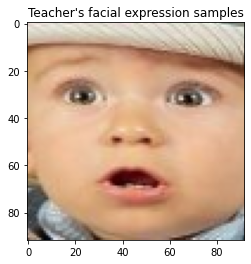

In [2]:
img = cv2.imread('train_09123.jpg')

tnet = Teacher()
tcheckpoint = torch.load('results/RAF_Teacher_False/Best_Teacher_model.t7')
tnet.load_state_dict(tcheckpoint['tnet'], strict=False)
tmean = [0.5884594, 0.45767313, 0.40865755]
tstd = [0.25717735, 0.23602168, 0.23505741]
timg = preprocess_image(img, tmean, tstd, resize_Teacher=True)

snet = CNN_RIS()
scheckpoint = torch.load('results/RAF_Student_False/PrivateTest_model.t7')
snet.load_state_dict(scheckpoint['net'], strict=False)
smean = [0.58846486, 0.45766878, 0.40865615]
sstd = [0.2516557, 0.23020789, 0.22939532]
simg = preprocess_image(img, smean, sstd, resize_Teacher=False)

with torch.no_grad():
    rb1_t, rb2_t, rb3_t, mimic_t, out_t = tnet(timg)
    rb1_s, rb2_s, rb3_s, mimic_s, out_s = snet(simg)

    
rb1_t = preprocess_feature(rb1_t)
rb2_t = preprocess_feature(rb2_t)
rb3_t = preprocess_feature(rb3_t)
out_t = preprocess_feature2(out_t)
rb1_s = preprocess_feature(rb1_s)
rb2_s = preprocess_feature(rb2_s)
rb3_s = preprocess_feature(rb3_s)
out_s = preprocess_feature2(out_s)


Teacher_img = cv2.resize(img, (92, 92))
print (Teacher_img.shape)
Teacher_img = Teacher_img[:,:,::-1] 
plt.figure("Teacher's facial expression samples") # 图像窗口名称
plt.imshow(Teacher_img)
plt.axis('on') # 关掉坐标轴为 off
plt.title("Teacher's facial expression samples") # 图像题目
plt.savefig('./Teacher_samples.jpg')
plt.show()

(44, 44, 3)


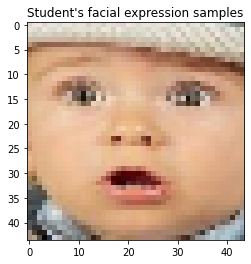

In [3]:
Student_img = cv2.resize(img, (44, 44))
print (Student_img.shape)
Student_img = Student_img[:,:,::-1] 
plt.figure("Student's facial expression samples") # 图像窗口名称
plt.imshow(Student_img)
plt.axis('on') # 关掉坐标轴为 off
plt.title("Student's facial expression samples") # 图像题目
plt.savefig('./Student_samples.jpg')
plt.show()

(96, 46, 46)


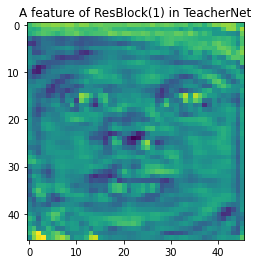

In [4]:
print (rb1_t.shape)
plt.figure("rb1_t") # 图像窗口名称
plt.imshow(rb1_t[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of ResBlock(1) in TeacherNet') # 图像题目
plt.savefig('./ResBlock1.jpg')
plt.show()

(160, 23, 23)


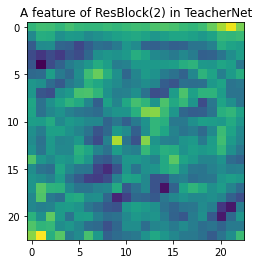

In [5]:
print (rb2_t.shape)
plt.figure("rb2_t") # 图像窗口名称
plt.imshow(rb2_t[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of ResBlock(2) in TeacherNet') # 图像题目
plt.savefig('./ResBlock2.jpg')
plt.show()

(272, 11, 11)


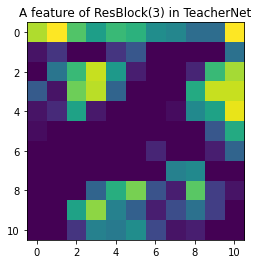

In [6]:
print (rb3_t.shape)
plt.figure("rb3_t") # 图像窗口名称
plt.imshow(rb3_t[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of ResBlock(3) in TeacherNet') # 图像题目
plt.savefig('./ResBlock3.jpg')
plt.show()

(96, 22, 22)


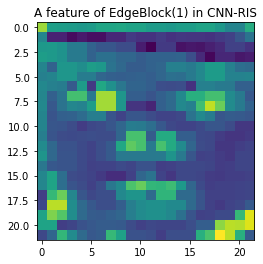

In [7]:
print (rb1_s.shape)
plt.figure("rb1_s") # 图像窗口名称
plt.imshow(rb1_s[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of EdgeBlock(1) in CNN-RIS') # 图像题目
plt.savefig('./EdgeBlock1.jpg')
plt.show()

(160, 11, 11)


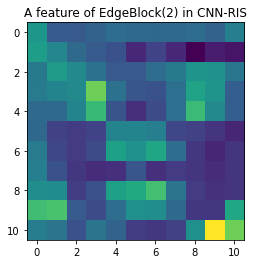

In [8]:
print (rb2_s.shape)
plt.figure("rb2_s") # 图像窗口名称
plt.imshow(rb2_s[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of EdgeBlock(2) in CNN-RIS') # 图像题目
plt.savefig('./EdgeBlock2.jpg')
plt.show()

(272, 5, 5)


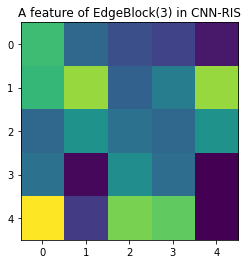

In [9]:
print (rb3_s.shape)
plt.figure("rb3_s") # 图像窗口名称
plt.imshow(rb3_s[0,:,:])
plt.axis('on') # 关掉坐标轴为 off
plt.title('A feature of EdgeBlock(3) in CNN-RIS') # 图像题目
plt.savefig('./EdgeBlock3.jpg')
plt.show()

(1, 7)


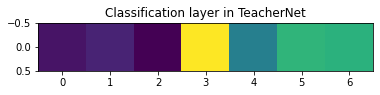

In [10]:
print (out_t.shape)
plt.figure("out_t") # 图像窗口名称
plt.imshow(out_t)
plt.axis('on') # 关掉坐标轴为 off
plt.title('Classification layer in TeacherNet') # 图像题目
plt.savefig('./Classification_T.jpg')
plt.show()

(1, 7)


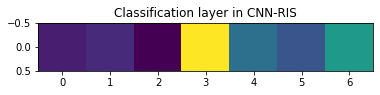

In [11]:
print (out_s.shape)
plt.figure("out_s") # 图像窗口名称
plt.imshow(out_s)
plt.axis('on') # 关掉坐标轴为 off
plt.title('Classification layer in CNN-RIS') # 图像题目
plt.savefig('./Classification_S.jpg')
plt.show()